In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("./animal.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(2847.5), np.float64(4271.5), np.float64(-0.5))

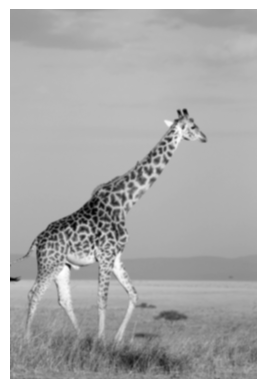

In [3]:
kernel_s = 25

average_blur = cv2.blur(image_gray, (kernel_s, kernel_s))

plt.imshow(average_blur, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(2847.5), np.float64(4271.5), np.float64(-0.5))

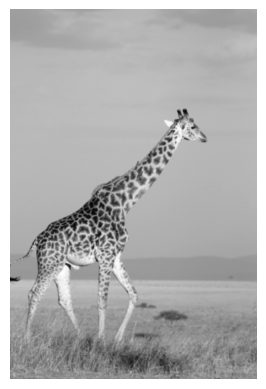

In [4]:
kernel_s = 25

gaussian_blur = cv2.GaussianBlur(image_gray, (kernel_s, kernel_s), 0) # 0 indicates that the standard deviation is calculated based on the kernel size
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

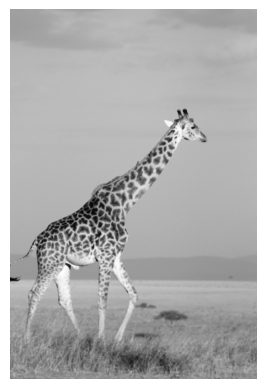

In [5]:
median_blur =cv2.medianBlur(image_gray, 15)
plt.imshow(median_blur, cmap='gray')
plt.axis('off')

cv2.imshow("Image window", median_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

for i in range (4):
    cv2.waitKey(1)

(np.float64(-0.5), np.float64(2847.5), np.float64(4271.5), np.float64(-0.5))

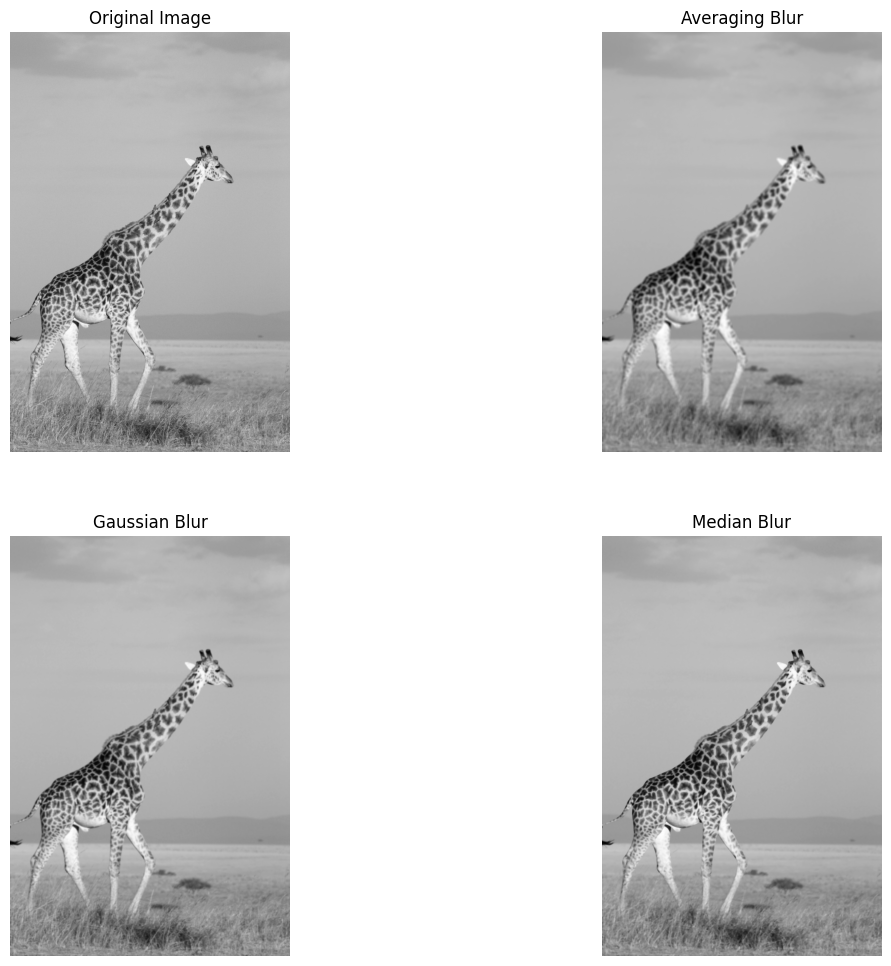

In [6]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Averaging Blur")
plt.imshow(average_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Median Blur")
plt.imshow(median_blur, cmap='gray')
plt.axis('off')

In [7]:
# Lưu các ảnh kết quả vào thư mục result
cv2.imwrite('./result/original_gray.jpg', image_gray)
cv2.imwrite('./result/averaging_blur.jpg', average_blur)
cv2.imwrite('./result/gaussian_blur.jpg', gaussian_blur)
cv2.imwrite('./result/median_blur.jpg', median_blur)


True

## So sánh hiệu quả các loại lọc trên cùng một ảnh

| **Tiêu chí** | **Averaging Blur** | **Gaussian Blur** | **Median Blur** |
|--------------|-------------------|-------------------|-----------------|
| **Nguyên lý hoạt động** | Thay thế pixel bằng giá trị trung bình của các pixel xung quanh | Sử dụng kernel Gaussian với trọng số giảm dần từ tâm ra ngoài | Thay thế pixel bằng giá trị trung vị của các pixel xung quanh |
| **Tốc độ xử lý** | Nhanh nhất | Trung bình | Chậm nhất |
| **Độ mờ của ảnh** | Mờ đồng đều, mất nhiều chi tiết | Mờ mượt mà, tự nhiên hơn | Mờ vừa phải, vẫn giữ được cạnh |
| **Khả năng bảo toàn cạnh** | Kém - Làm mờ cả cạnh | Trung bình - Vẫn làm mờ cạnh | Tốt - Bảo toàn cạnh rõ ràng |
| **Khả năng giảm nhiễu Gaussian** | Tốt | Rất tốt | Trung bình |
| **Khả năng loại bỏ nhiễu muối tiêu** | Kém | Kém | Xuất sắc |
| **Độ nhạy với giá trị ngoại lệ** | Nhạy - Bị ảnh hưởng bởi outliers | Nhạy - Bị ảnh hưởng bởi outliers | Không nhạy - Không bị ảnh hưởng |
| **Độ phức tạp tính toán** | O(k²) - Đơn giản | O(k²) - Vừa phải | O(k² log k) - Phức tạp |
| **Phù hợp với** | Làm mờ nhanh, giảm nhiễu nhẹ | Làm mờ tự nhiên, tiền xử lý ảnh | Loại bỏ nhiễu muối tiêu, bảo toàn cạnh |

### **Kết quả quan sát với kernel size = 25:**
- **Averaging Blur**: Ảnh bị mờ đồng đều, các cạnh và chi tiết bị làm mờ đáng kể
- **Gaussian Blur**: Ảnh mờ mượt mà hơn, có vẻ tự nhiên hơn Averaging Blur
- **Median Blur**: Ảnh được làm mờ nhưng các cạnh vẫn được giữ rõ ràng nhất

### **Khuyến nghị sử dụng:**
- **Averaging Blur**: Khi cần tốc độ cao, không quan trọng chi tiết cạnh
- **Gaussian Blur**: Ứng dụng phổ biến nhất, cân bằng tốt giữa chất lượng và tốc độ
- **Median Blur**: Khi ảnh có nhiễu muối tiêu hoặc cần bảo toàn cạnh quan trọng